# Random Forests

Read sections 15.1 - 15.3, select a dataset and perform a classification or regression on the dataset using the random forest algorithm in sci-kit learn. Plot the feature importance.

In [ ]:
# Forest Fire Data Again
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


Baseline prediction (average value) is:  13.079782082324453
The MSE for the baseline average prediction is:  925.2124641981679
The MSE for our model is:  719.6230928736621
Our random forests model is 22.22 % better than the baseline (surprisingly low improvement :( )
Feature: 0, Score: 0.03312
Feature: 1, Score: 0.10742
Feature: 2, Score: 0.04700
Feature: 3, Score: 0.04707
Feature: 4, Score: 0.57587
Feature: 5, Score: 0.13567
Feature: 6, Score: 0.05384
Feature: 7, Score: 0.00001
Features 1,4,5 line up with our DMC, Temperature and Relative Humidity columns respectively,
and this agrees with the feature importance gathered from xgboost trees.
NOTE PERFORMANCE VARIES HIGHLY WITH RANDOM STATE


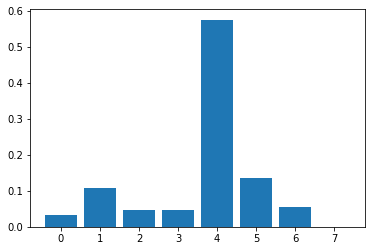

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from matplotlib import pyplot
import sys
from numpy.linalg import inv
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance 
data = pd.read_csv('forestfires.csv')
data.feature_names = (list(data.columns.values)[4:12]) 

# Independent Variables / Features
'''
FFMC - FFMC index from the FWI system: 18.7 to 96.20
DMC - DMC index from the FWI system: 1.1 to 291.3
DC - DC index from the FWI system: 7.9 to 860.6
ISI - ISI index from the FWI system: 0.0 to 56.10
temp - temperature in Celsius degrees: 2.2 to 33.30
RH - relative humidity in %: 15.0 to 100
wind - wind speed in km/h: 0.40 to 9.40
rain - outside rain in mm/m2 : 0.0 to 6.4
'''
x = data.iloc[:,4:-1]

# Dependent Variable / Target Variable
# area (0.00 to 1090.84)
y = data.iloc[:,-1]

# 80% train, 10% validation, 10% test
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1
# train 80% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1 - train_ratio, random_state = 12 )

# test is 10% of the initial data set
# validation is 10% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = test_ratio/(test_ratio + validation_ratio), random_state = 16) 
#getting baseline
#print('x_train size is', x_train.shape)
#print('x_val size is', x_val.shape)
#print('x_test size is', x_test.shape)
mean_train = np.mean(y_train)
baseline = np.ones(y_test.shape)*mean_train
print("Baseline prediction (average value) is: ", mean_train)
baseline_error = mean_squared_error(baseline,y_test)
print("The MSE for the baseline average prediction is: ", baseline_error)

# Normalizing by row
#def normalize(data):
#  normed_data = x.div(x.max(axis=1), axis=0)
#  return normed_data
#Building the Model
regressor = RandomForestRegressor(n_estimators = 24, max_depth= 15, random_state=50) 

#Our data seems to be strange in that the minimum resulting MSE when comparing to test output seems to be with a really small number of estimators
#(The MSE then skyrockets and then drops but acts sporadically and never reaches a point where it is more accurate than baseline ever again)
#MSE hovers around 1200 when reaching exorbitant estimator values
#We debated using MAE instead as our loss function, but it returned similar results

regressor = regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

error = mean_squared_error(y_pred,y_test)
print("The MSE for our model is: ", error)
percentage = round((baseline_error - error) / baseline_error * 100, 2)
print("Our random forests model is", percentage,"% better than the baseline (surprisingly low improvement :( )")

importance = regressor.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
#importances = y_pred.feature_importances_
#indices = np.argsort(importances)[::-1]
#names = []
#xgb.plot_importance(model)
#plt.rcParams['figure.figsize'] = [100, 10]
#plt.show()
#labels= data.getfeature_names()
#feature_names=y[:-1]
#plot_feature_importance(rf_model.feature_importances_,train.columns,'RANDOM FOREST')
#regressor.feature_importances_
#plt.barh(data.feature_names, regressor.feature_importances_)
print("Features 1,4,5 line up with our DMC, Temperature and Relative Humidity columns respectively,")
print("and this agrees with the feature importance gathered from xgboost trees.")
print("NOTE PERFORMANCE VARIES HIGHLY WITH RANDOM STATE")